In [16]:
import numpy as np
import matplotlib.pyplot as plt
from utils.collisions.NASA_SBM_frags import *

In [33]:
p1_in = np.array([
    100,  # mass in kg
    5,     # radius in meters
    7178,  # r_x in km
    0,  # r_y in km
    0,  # r_z in km
    0,     # v_x in km/s
    7.4,     # v_y in km/s
    0,    # v_z in km/s
    1.0      # object_class (dimensionless)
])

p2_in = np.array([
    100,     # mass in kg
    1,     # radius in meters
    7178,  # r_x in km
    0,  # r_y in km
    0,  # r_z in km
    0,     # v_x in km/s
    7.4,     # v_y in km/s
    0,    # v_z in km/s
    1.0      # object_class (dimensionless)
])

# Define the param dictionary
param = {
    'req': 6.3781e+03,
    'mu': 3.9860e+05,
    'j2': 0.0011,
    'max_frag': float('inf'),  # Inf in MATLAB translates to float('inf') in Python
    'maxID': 0,
    'density_profile': 'static'
}

# Lower bound (LB)
LB = 0.1  # Assuming this is the lower bound in meters

debris1, debris2, isCatastrophic = frag_col_SBM_vec_lc2(0, p1_in, p2_in, param, LB)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\IT\anaconda3\envs\pyssem-env\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\IT\AppData\Local\Temp\ipykernel_69512\1835184305.py", line 38, in <module>
    debris1, debris2, isCatastrophic = frag_col_SBM_vec_lc2(0, p1_in, p2_in, param, LB)
  File "C:\Users\IT\Documents\UCL\pyssem\pyssem\utils\collisions\NASA_SBM_frags.py", line 249, in frag_col_SBM_vec_lc2
ValueError: need at least one array to concatenate

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\IT\anaconda3\envs\pyssem-env\lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\IT\anaconda3\envs\pyssem-env\lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structur

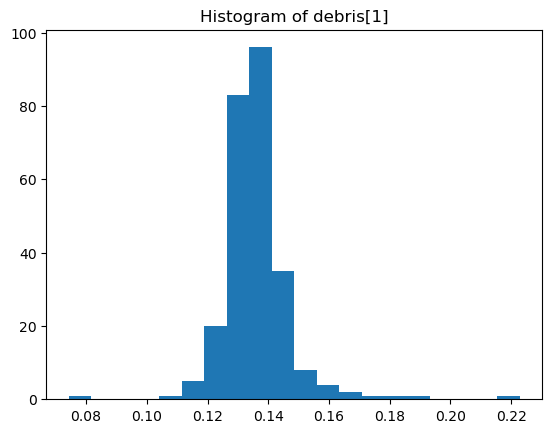

In [31]:
# create a histogram of all of of debris[1]

data = debris1[:, 1]
plt.hist(data, bins=20)
plt.title('Histogram of debris[1]')
plt.show()


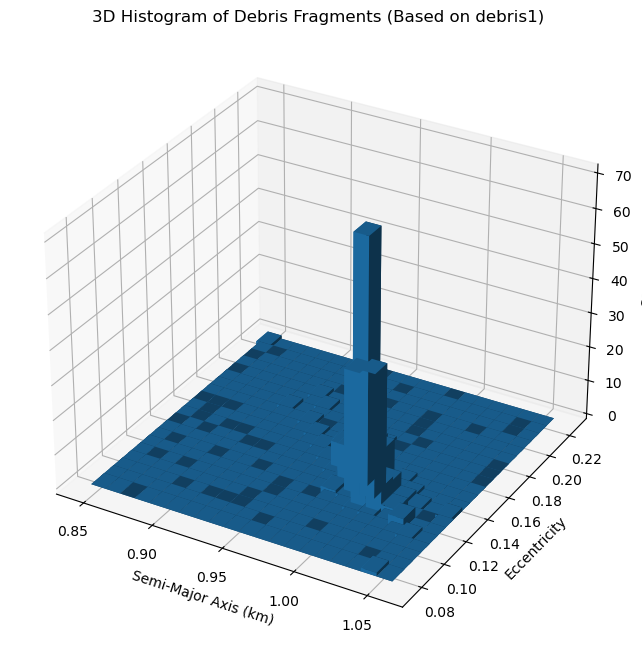

In [32]:
semi_major_axis = [debris[0] for debris in debris1]
eccentricity = [debris[1] for debris in debris1]

# Create 2D histogram
counts, x_edges, y_edges = np.histogram2d(semi_major_axis, eccentricity, bins=20)

# Set up the grid for the 3D bar plot
x_pos, y_pos = np.meshgrid(x_edges[:-1], y_edges[:-1], indexing="ij")
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
z_pos = np.zeros_like(x_pos)

# Size of the bars
dx = dy = np.diff(x_edges)[0]
dz = counts.ravel()

# Plotting the 3D histogram
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, shade=True)

# Axis labels
ax.set_xlabel('Semi-Major Axis (km)')
ax.set_ylabel('Eccentricity')
ax.set_zlabel('Count')
ax.set_title('3D Histogram of Debris Fragments (Based on debris1)')

plt.show()